In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# %cd /content/drive/'My Drive'/DACN
import os
path = "/content/drive/My Drive/Doan2"
os.chdir(path)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



ModuleNotFoundError: No module named 'seaborn'

In [4]:
# Đọc dữ liệu
squat_df = pd.read_csv("Squat.txt")
hand_df = pd.read_csv("Hand.txt")
pushup_df = pd.read_csv("Pushup.txt")
pullup_df = pd.read_csv("Pullup.txt")
normal_df =pd.read_csv("normal.txt")
X = []
y = []
no_of_timesteps = 10

In [5]:
dataset = squat_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append([1, 0, 0, 0, 0 ])

dataset = hand_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append([0, 1, 0, 0, 0])

dataset = pushup_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append([0, 0 ,1, 0, 0])

dataset = pullup_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append([0, 0, 0, 1, 0])
dataset = normal_df.iloc[:,1:].values
n_sample = len(dataset)
for i in range(no_of_timesteps, n_sample):
    X.append(dataset[i-no_of_timesteps:i,:])
    y.append([0, 0, 0, 0, 1])

In [6]:
Action_labels = ['Squat', 'Hand', 'Pushup', 'Pullup', 'normal']

In [7]:
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



(1523, 10, 132) (1523, 5)


In [8]:

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            36600     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [9]:
early_stoping_callback = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


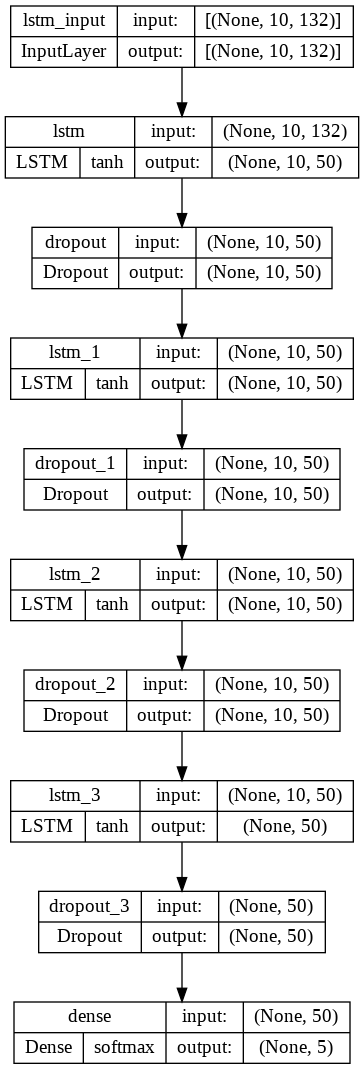

In [10]:
plot_model(model, to_file="architecture.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [11]:
history=model.fit(X_train, y_train, epochs=20, batch_size=64,validation_data=(X_test, y_test))
model.save("model.h5")

Epoch 1/20
20/20 [==============================] - 14s 141ms/step - loss: 1.3428 - accuracy: 0.4163 - val_loss: 0.8615 - val_accuracy: 0.7082
Epoch 2/20
20/20 [==============================] - 1s 29ms/step - loss: 0.5991 - accuracy: 0.7767 - val_loss: 0.3425 - val_accuracy: 0.9443
Epoch 3/20
20/20 [==============================] - 1s 29ms/step - loss: 0.2915 - accuracy: 0.9360 - val_loss: 0.1852 - val_accuracy: 0.9443
Epoch 4/20
20/20 [==============================] - 1s 30ms/step - loss: 0.1552 - accuracy: 0.9557 - val_loss: 0.0628 - val_accuracy: 0.9869
Epoch 5/20
20/20 [==============================] - 1s 30ms/step - loss: 0.0587 - accuracy: 0.9893 - val_loss: 0.0338 - val_accuracy: 0.9967
Epoch 6/20
20/20 [==============================] - 1s 30ms/step - loss: 0.0432 - accuracy: 0.9918 - val_loss: 0.1102 - val_accuracy: 0.9705
Epoch 7/20
20/20 [==============================] - 1s 30ms/step - loss: 0.0280 - accuracy: 0.9926 - val_loss: 0.0152 - val_accuracy: 0.9967
Epoch 8/20


In [12]:
evaluation_histor = model.evaluate(X_test, y_test)
evaluation_histor

10/10 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 1.0000


[0.002357379300519824, 1.0]

In [13]:
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("LSTM Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

10/10 [==============================] - 1s 7ms/step
LSTM Model Accuracy on test set: 1.0000


In [14]:
train_true = np.argmax(y_train, axis=1)
train_pred = np.argmax(model.predict(X_train), axis=1)
print("LSTM Model Accuracy on trainning set: {:.4f}".format(accuracy_score(train_true, train_pred)))

39/39 [==============================] - 0s 6ms/step
LSTM Model Accuracy on trainning set: 1.0000


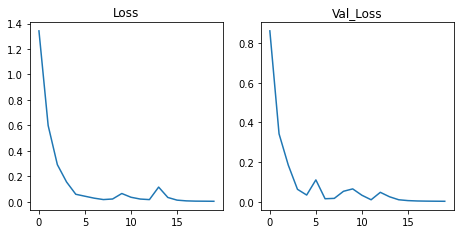

In [15]:
epochs = history.epoch
loss = history.history['loss']

plt.figure(figsize=(20,20))
plt.subplot(551,title="Loss")
plt.plot(epochs, loss)

val_loss = history.history['val_loss']
plt.subplot(552,title="Val_Loss")
plt.plot(epochs, val_loss)


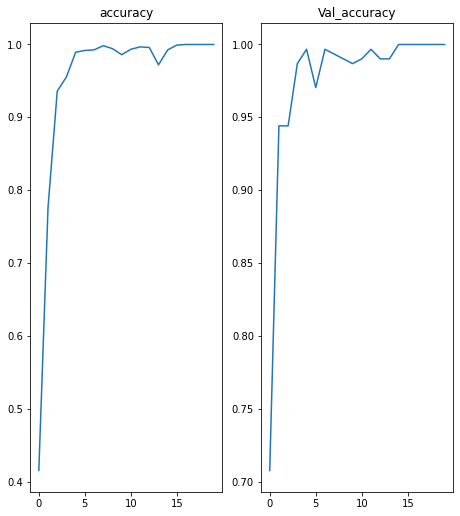

In [16]:
epochs = history.epoch
accuracy = history.history['accuracy']

plt.figure(figsize=(20,50))
plt.subplot(551,title="accuracy")
plt.plot(epochs, accuracy)

val_accuracy = history. history['val_accuracy']
plt.subplot(552,title="Val_accuracy")
plt.plot(epochs, val_accuracy)

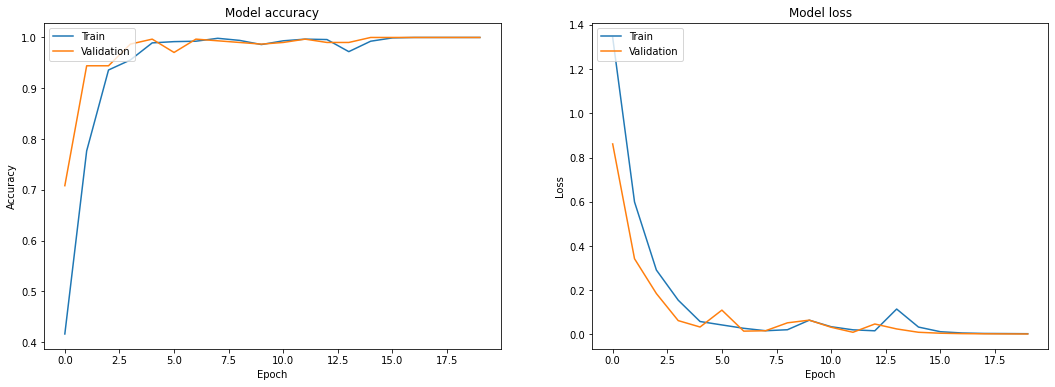

In [17]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

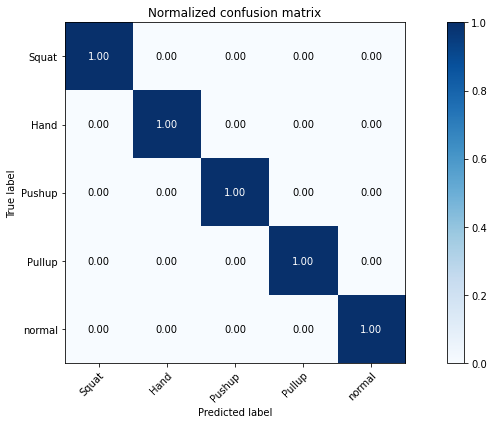

In [19]:
plot_confusion_matrix(test_true, test_pred, classes=Action_labels, normalize=True, title='Normalized confusion matrix')
plt.show()